# Customer Behaviour Analysis

This analysis focuses on understanding customer purchasing behaviour to gain insights into customer engagement, loyalty, and value.

## What We Will Explore:

## 1. Descriptive Statistics
- **Total Sales**: Overall revenue generated.
- **Average Transaction Value**: Average spend per transaction.
- **Unique Customers**: Number of distinct customers.

## 2. Customer Behaviour Metrics (RFM Analysis)
- **Recency**: Days since last purchase.
- **Frequency**: Number of purchases.
- **Monetary**: Total spending.

## 3. Visualizations

To better understand the data distribution and patterns, we will use:

- **Matplotlib**: For basic histograms showing the distribution of Recency.
- **Matplotlib**: horizontal bar chart displays the top 10 customers ranked by their total spending, with exact amounts labeled for clear comparison.


These charts will provide both static and interactive views of customer behaviour, helping to identify key insights effectively.



## Importing Libraries

Before we begin our customer behaviour analysis, we need to import the essential Python libraries that will help us load, process, and visualize the data.

### Libraries Used:

- **pandas**: For data manipulation and analysis (e.g., reading data, grouping, summarizing).
- **numpy**: For numerical operations and handling arrays.
- **datetime**: For working with dates, which is important when calculating recency.
- **matplotlib.pyplot**: A core Python library for creating static visualizations like histograms and bar charts.
- **seaborn**: A higher-level visualization library built on top of matplotlib, useful for more aesthetic charts like boxplots and distribution plots.
- **plotly.express**: For interactive and dynamic visualizations like scatter plots and bar charts that allow user interaction.

### Display Settings:

- `%matplotlib inline`: Ensures that Matplotlib charts appear directly within the notebook cells.
- `plt.style.use('ggplot')`: Applies a clean and visually appealing style to Matplotlib plots.
- `sns.set(style='whitegrid')`: Sets the background style of Seaborn plots to show light gridlines for better readability.

These libraries will provide the tools we need to perform data cleaning, exploratory analysis, and visual storytelling throughout this notebook.


In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Working with dates
from datetime import datetime

# Data visualization (static)
import matplotlib.pyplot as plt
import seaborn as sns

# Data visualization (interactive)
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'


# Display settings
%matplotlib inline
plt.style.use('ggplot')        # Use ggplot style for matplotlib
sns.set(style='whitegrid')     # Set seaborn plot style to white grid

# Optional: Ignore warning messages for cleaner output
import warnings
warnings.filterwarnings('ignore')


In [5]:
#load cleaned dataset
#parse_dates automatically converts string dates into proper datetime format when reading a CSV.
df = pd.read_csv('../data/cleaned/cleaned_online_retail.csv', parse_dates=['InvoiceDate'])

df.head

<bound method NDFrame.head of        InvoiceNo StockCode                          ProductName  Quantity  \
0         536365    85123A   white hanging heart t-light holder         6   
1         536365     71053                  white metal lantern         6   
2         536365    84406B       cream cupid hearts coat hanger         8   
3         536365    84029G  knitted union flag hot water bottle         6   
4         536365    84029E       red woolly hottie white heart.         6   
...          ...       ...                                  ...       ...   
524873    581587     22613          pack of 20 spaceboy napkins        12   
524874    581587     22899          children's apron dolly girl         6   
524875    581587     23254         childrens cutlery dolly girl         4   
524876    581587     23255      childrens cutlery circus parade         4   
524877    581587     22138         baking set 9 piece retrospot         3   

               InvoiceDate  UnitPrice  Custom

In [6]:
#Explore cleaned dataset
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524878 entries, 0 to 524877
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    524878 non-null  object        
 1   StockCode    524878 non-null  object        
 2   ProductName  524878 non-null  object        
 3   Quantity     524878 non-null  int64         
 4   InvoiceDate  524878 non-null  datetime64[ns]
 5   UnitPrice    524878 non-null  float64       
 6   CustomerID   524878 non-null  int64         
 7   Country      524878 non-null  object        
 8   TotalPrice   524878 non-null  float64       
 9   Year         524878 non-null  int64         
 10  Month        524878 non-null  int64         
 11  Day          524878 non-null  int64         
 12  Hour         524878 non-null  int64         
 13  Weekday      524878 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)
memory usage: 56.1+ MB


In [7]:
#to see column names
df.columns

Index(['InvoiceNo', 'StockCode', 'ProductName', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'TotalPrice', 'Year', 'Month',
       'Day', 'Hour', 'Weekday'],
      dtype='object')

## 1. Descriptive Statistics
- **Total Sales**: Overall revenue generated.
- **Average Transaction Value**: Average spend per transaction.
- **Unique Customers**: Number of distinct customers.


In [8]:
# Total Sales
total_sales = df['TotalPrice'].sum()

# Average Transaction Value per Invoice
avg_transaction_value = df.groupby('InvoiceNo')['TotalPrice'].sum().mean()

# Number of Unique Customers
unique_customers = df['CustomerID'].nunique()

# Total Number of Transactions
total_transactions = df['InvoiceNo'].nunique()

# Total Quantity Sold
total_quantity = df['Quantity'].sum()

# Display the results
print("📊 Descriptive Statistics:")
print(f"Total Sales: £{total_sales:,.2f}")
print(f"Average Transaction Value: £{avg_transaction_value:,.2f}")
print(f"Number of Unique Customers: {unique_customers}")
print(f"Total Number of Transactions: {total_transactions}")
print(f"Total Quantity Sold: {total_quantity}")


📊 Descriptive Statistics:
Total Sales: £10,642,110.80
Average Transaction Value: £533.12
Number of Unique Customers: 4338
Total Number of Transactions: 19962
Total Quantity Sold: 5572420


## 2. Customer Behaviour Metrics (RFM Analysis)

RFM analysis segments customers based on three key metrics:

Recency: How recently a customer made a purchase.

Frequency: How often a customer makes purchases.

Monetary: How much money a customer has spent in total.

In [9]:
# RFM Analysis: Calculate Recency, Frequency, and Monetary metrics per customer

# 1. Define the snapshot date:
#    This is the reference date from which we measure Recency.
#    We set it as one day after the most recent purchase date in the dataset,
#    assuming the dataset ends on the last transaction date.
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# 2. Calculate Recency: Number of days since the customer's last purchase
recency = df.groupby('CustomerID')['InvoiceDate'].max().apply(lambda x: (snapshot_date - x).days)

# 3. Calculate Frequency: Number of unique invoices (transactions) made by the customer
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()

# 4. Calculate Monetary: Total amount spent by the customer
monetary = df.groupby('CustomerID')['TotalPrice'].sum()

# 5. Combine Recency, Frequency, and Monetary into a single DataFrame for analysis
rfm = pd.DataFrame({
    'CustomerID': recency.index,
    'Recency': recency.values,
    'Frequency': frequency.values,
    'Monetary': monetary.values
})

# Display the first few rows of the RFM table
print(rfm.head())


   CustomerID  Recency  Frequency  Monetary
0       12346      326          1  77183.60
1       12347        2          7   4310.00
2       12348       75          4   1797.24
3       12349       19          1   1757.55
4       12350      310          1    334.40


In [30]:
#To keep your RFM metrics organized, it’s best to create a separate rfm DataFrame:

# Create RFM table
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
})

# Rename columns
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

# Preview
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,77183.60
12347,2,7,4310.00
12348,75,4,1797.24
12349,19,1,1757.55
12350,310,1,334.40


## 3. Visualizations

### Recency Distribution

This histogram shows the distribution of **Recency**, which measures how many days ago each customer made their last purchase.  
Customers with lower recency values have shopped more recently and are generally more engaged.


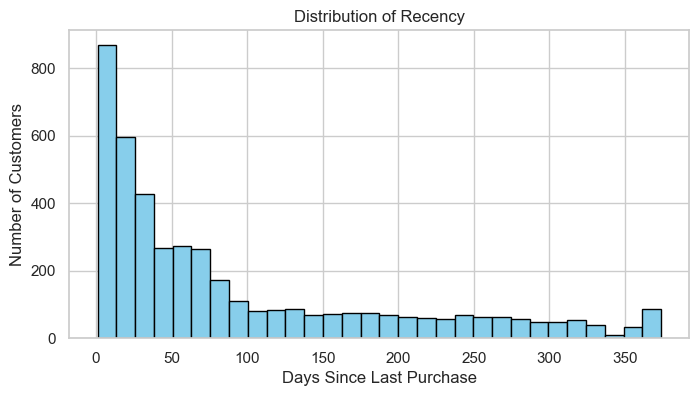

In [10]:
plt.figure(figsize=(8, 4))
plt.hist(rfm['Recency'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Recency')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()


### Top 10 Customers by Total Spend (Colored Horizontal Bar Chart)

This horizontal bar chart shows the top 10 customers based on their total monetary value (total amount spent).  
- Each bar represents a unique customer and is assigned a different color for clear visual differentiation.  
- Bars are ordered from highest to lowest spender, making it easy to identify the most valuable customers.  
- The total spend amount is displayed at the end of each bar to provide precise insight into customer value.  
This chart provides a straightforward way to visualize and compare customer spending, helping in targeted marketing and customer relationship management.


In [ ]:
#to find the top top customers by using rfm dataframe
top_10_customers = rfm.sort_values(by='Monetary', ascending=False).head(10)
top_10_customers


,CustomerID,Recency,Frequency,Monetary
2159,15287,1,1431,1755388.60
1689,14646,2,73,280206.02
4201,18102,1,60,259657.30
3728,17450,8,46,194390.79
3008,16446,1,2,168472.50
1879,14911,1,201,143711.17
55,12415,24,21,124914.53
1333,14156,10,55,117210.08
3771,17511,3,31,91062.38
2702,16029,39,63,80850.84


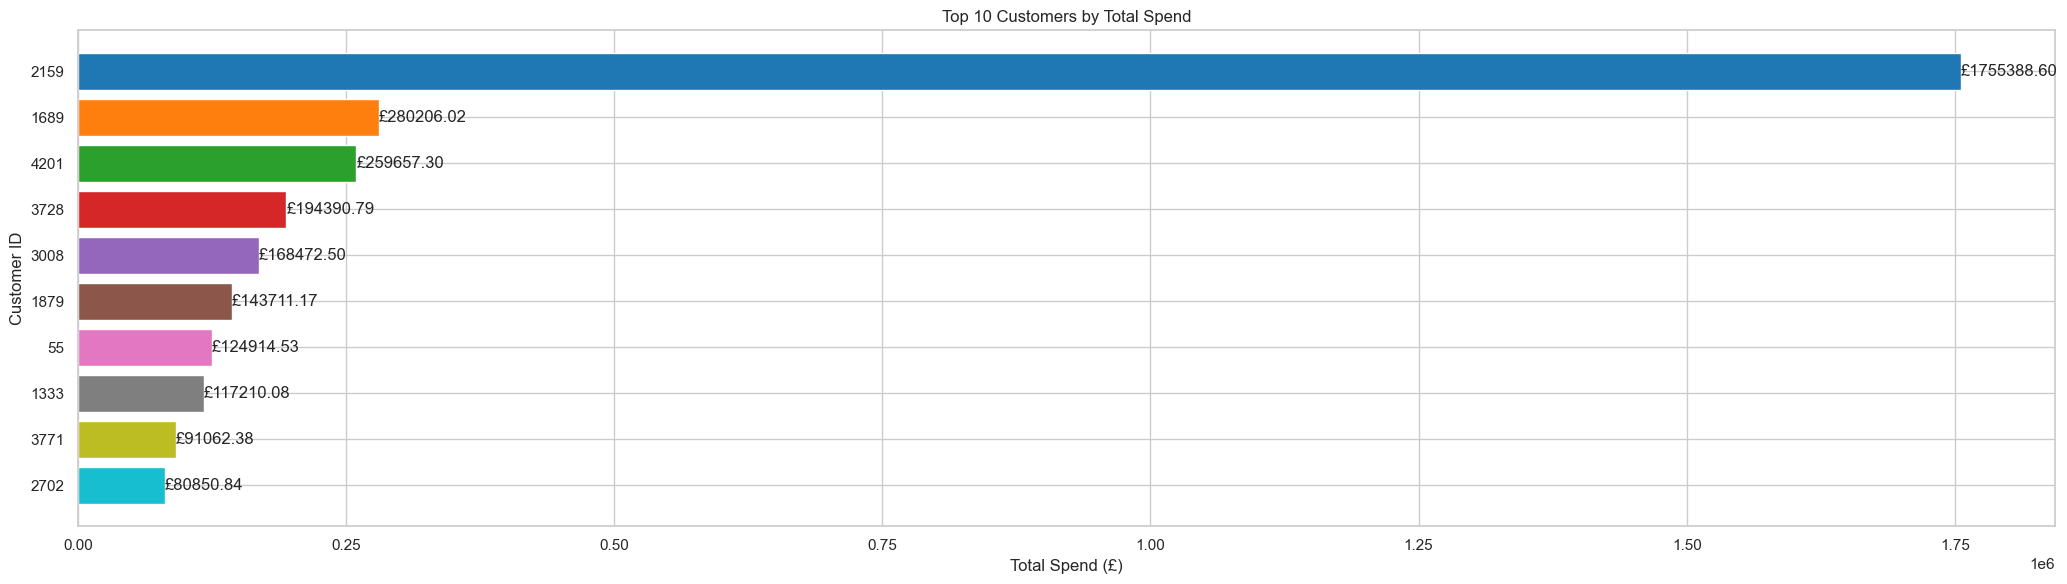

In [28]:

# Get top 10 customers by Monetary value
top_customers = rfm.sort_values(by='Monetary', ascending=False).head(10)

# Generate a list of distinct colors (one for each customer)
colors = plt.cm.tab10(np.arange(len(top_customers)))  # tab10 colormap has 10 distinct colors

# Plot horizontal bar chart with different colors
plt.figure(figsize=(21, 6))
bars = plt.barh(top_customers.index.astype(str), top_customers['Monetary'], color=colors)
plt.xlabel('Total Spend (£)')
plt.ylabel('Customer ID')
plt.title('Top 10 Customers by Total Spend')

# Annotate bars with exact values
for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2, f'£{width:.2f}', va='center')

# Invert y-axis to show highest spender at the top
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Identifying High-Value, Low-Frequency Customers visualization

This analysis focuses on customers who have made very few purchases but have spent a high amount overall. These are potentially valuable customers worth re-engaging, as they show high spending potential despite limited activity.

- **Metric Used**: Frequency vs. Monetary
- **Goal**: Find customers with low purchase frequency but high total spending
- **Chart Type**: Scatter plot (Seaborn or Plotly)


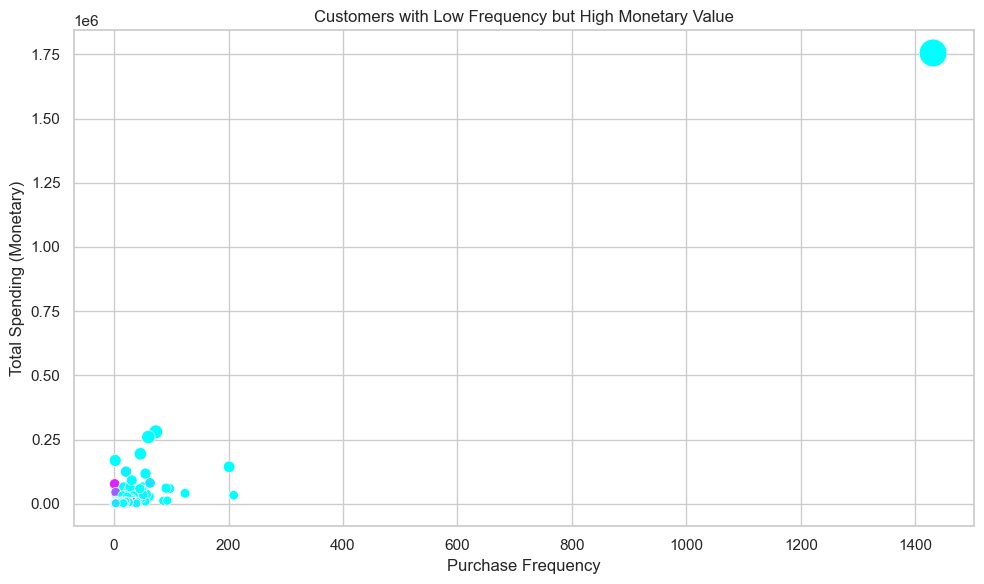

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Recency', palette='cool', size='Monetary', sizes=(40, 400), legend=False)
plt.title('Customers with Low Frequency but High Monetary Value')
plt.xlabel('Purchase Frequency')
plt.ylabel('Total Spending (Monetary)')
plt.grid(True)
plt.tight_layout()
plt.show()


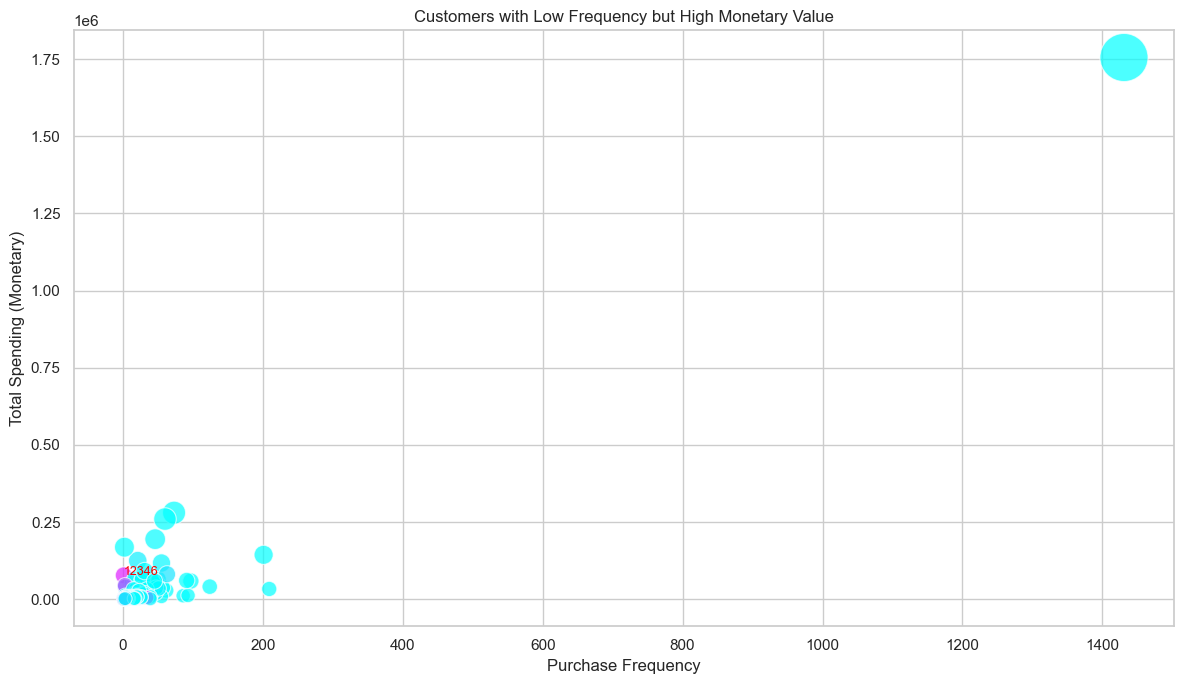

In [18]:


# Define threshold to highlight outliers (e.g., single purchase over 50,000)
outliers = rfm[(rfm['Frequency'] == 1) & (rfm['Monetary'] > 50000)]

plt.figure(figsize=(12, 7))
scatter = sns.scatterplot(
    data=rfm,
    x='Frequency',
    y='Monetary',
    hue='Recency',
    palette='cool',
    size='Monetary',
    sizes=(100, 1200),  # Increased dot size
    legend=False,
    alpha=0.7
)

# Highlight outliers with annotations
for i, row in outliers.iterrows():
    plt.text(row['Frequency'], row['Monetary'], str(int(row['CustomerID'])), fontsize=9, color='red')

plt.title('Customers with Low Frequency but High Monetary Value')
plt.xlabel('Purchase Frequency')
plt.ylabel('Total Spending (Monetary)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
import plotly.express as px

fig = px.scatter(
    rfm,
    x='Frequency',
    y='Monetary',
    color='Recency',
    size='Monetary',
    hover_data=['Frequency', 'Monetary', 'Recency'],
    title='Customer Segmentation: Frequency vs Monetary (Colored by Recency)',
    labels={
        'Frequency': 'Purchase Frequency',
        'Monetary': 'Total Spend (£)',
        'Recency': 'Days Since Last Purchase'
    },
    color_continuous_scale='Viridis',
    size_max=60
)

fig.update_layout(
    width=900,
    height=600,
    template='plotly_white'
)

fig.show()
